<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/CHAPTER_5_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

In [2]:
def dhdt(s):
    
    dhdt = 1 - np.sqrt(h)/np.sqrt(5)
    dhldt = 0.5 - 0.1*h

    return [dhdt, dhldt]

In [3]:
h = np.linspace(0,10,100)
dhdt, dhldt = dhdt(h)

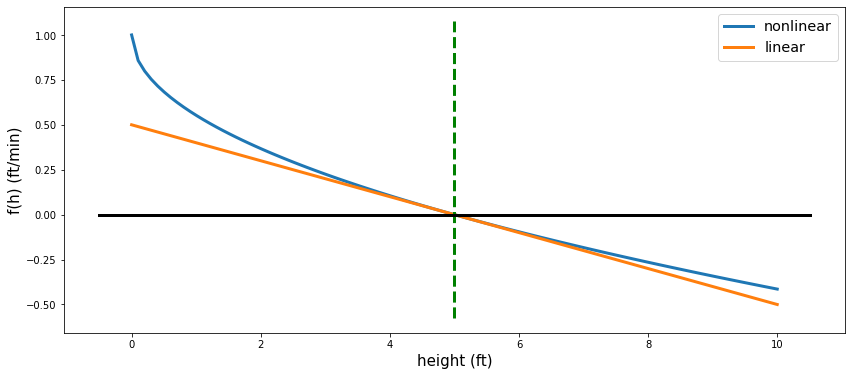

In [4]:
plt.figure(figsize= (14,6))
plt.plot(h,dhdt, h, dhldt,linewidth = 3)
plt.plot([5,5],plt.ylim(),'g--',linewidth = 3)
plt.plot(plt.xlim(),[0,0],"black",linewidth = 3)
plt.xlabel("height (ft)", size = 15)
plt.ylabel("f(h) (ft/min)", size = 15)
plt.legend(["nonlinear", "linear"], fontsize = "x-large")

In [5]:
def height(s,t):

    h = s[0]
    hl = s[1]

    # nonlinear model
    # dhdt = 1 - sqrt(h)/sqrt(5) # no es lineal!
    dhdt = 1 - np.sqrt(h)/np.sqrt(5)

    # linear model
    # sí es lineal 
    dhldt = 0.5 - 0.1*hl

    return [dhdt, dhldt]

In [6]:
# initial conditions 
s1 = [5, 5]
s2 = [0, 0]
s3 = [10, 10]
s = (s1,s2,s3)

In [7]:
# integration time 
time = np.linspace(0, 50, 100)

In [8]:
for i in range(3):
    # solve ODEs
    if i == 0:
        out = odeint(height, s[i], time)
    else:
        out = np.column_stack((out, odeint(height, s[i], time)))

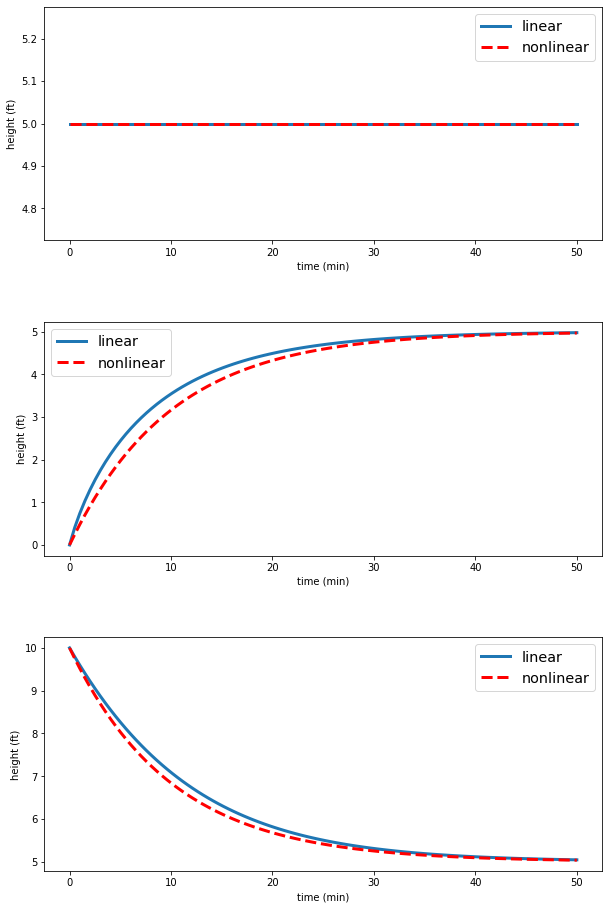

In [9]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(time, out[:,0],time, out[:,1],"r--", linewidth = 3)
plt.xlabel("time (min)")
plt.ylabel("height (ft)")
plt.legend(["linear", "nonlinear"], fontsize = "x-large")
plt.subplot(3,1,2)
plt.plot(time, out[:,2],time, out[:,3],"r--", linewidth = 3)
plt.xlabel("time (min)")
plt.ylabel("height (ft)")
plt.legend(["linear", "nonlinear"], fontsize = "x-large")
plt.subplot(3,1,3)
plt.plot(time, out[:,4],time, out[:,5],"r--", linewidth = 3)
plt.xlabel("time (min)")
plt.ylabel("height (ft)")
plt.legend(["linear", "nonlinear"], fontsize = "x-large")
plt.subplots_adjust(bottom=0.1, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

In [10]:
A = np.matrix([[-0.5, 1],[0, -2]])

In [11]:
eigenval, eigenvec = np.linalg.eig(A)

In [12]:
print(eigenval)

[-0.5 -2. ]


In [13]:
print(eigenvec)

[[ 1.         -0.5547002 ]
 [ 0.          0.83205029]]


In [14]:
def direction(s,t):

    # state variables 
    x1 = s[0]
    x2 = s[1]

    dx1dt = -0.5*x1 + x2

    dx2dt = -2*x2

    return [dx1dt, dx2dt] 

In [15]:
# initial conditions 
s1 = [1,0]
s2 = [-0.5547,0.8320]
s = (s1,s2)

In [16]:
# integration time 
time = np.linspace(0,5,100)

In [17]:
out = []

In [18]:
for i in range(2):
    if i == 0:
        out = odeint(direction,s[i],time)
    else:
        out = np.column_stack((out, odeint(direction, s[i],time)))

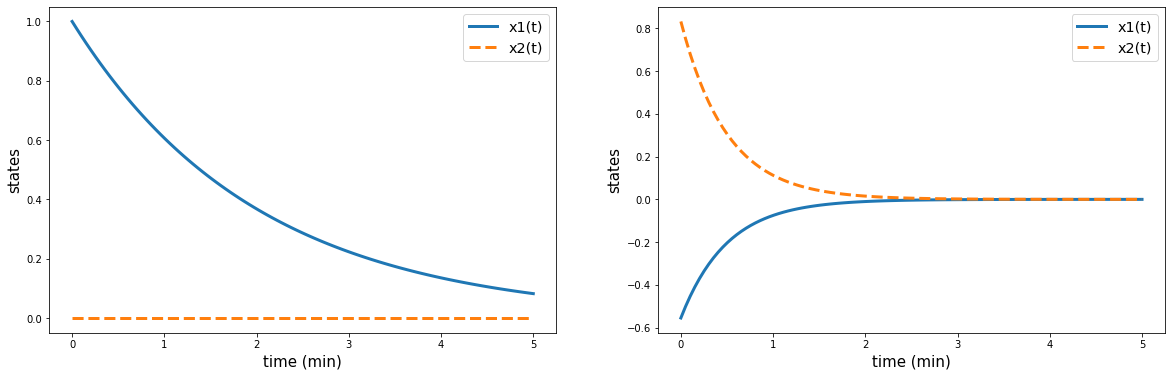

In [19]:
plt.figure(figsize= (20,6))
plt.subplot(1,2,1)
plt.plot(time, out[:,0],time, out[:,1], "--", linewidth = 3)
plt.xlabel("time (min)", size = 15)
plt.ylabel("states", size = 15)
plt.legend(["x1(t)","x2(t)"], fontsize = "x-large")
plt.subplot(1,2,2)
plt.plot(time, out[:,2],time, out[:,3], "--", linewidth = 3)
plt.xlabel("time (min)", size = 15)
plt.ylabel("states", size = 15)
plt.legend(["x1(t)","x2(t)"], fontsize = "x-large")

In [20]:
B = np.matrix([[2, 1],[2, -1]])

In [21]:
eigenval, eigenvec = np.linalg.eig(B)

In [22]:
print(eigenval)

[ 2.56155281 -1.56155281]


In [23]:
print(eigenvec)

[[ 0.87192821 -0.27032301]
 [ 0.48963374  0.96276969]]


In [24]:
def unstable(s,t):

    x1 = s[0]
    x2 = s[1]

    dx1dt = 2*x1 + x2
    dx2dt = 2*x1-x2

    return [dx1dt, dx2dt]

In [25]:
s1 = [-0.27032301, 0.96276969]
s2 = [0.87192821, 0.48963374]
s = (s1,s2)

In [26]:
time = np.linspace(0,4,100)

In [27]:
for i in range(2):
    if i == 0:
        out = odeint(unstable, s[i], time)
    else:
        out = np.column_stack((out, odeint(unstable, s[i], time)))

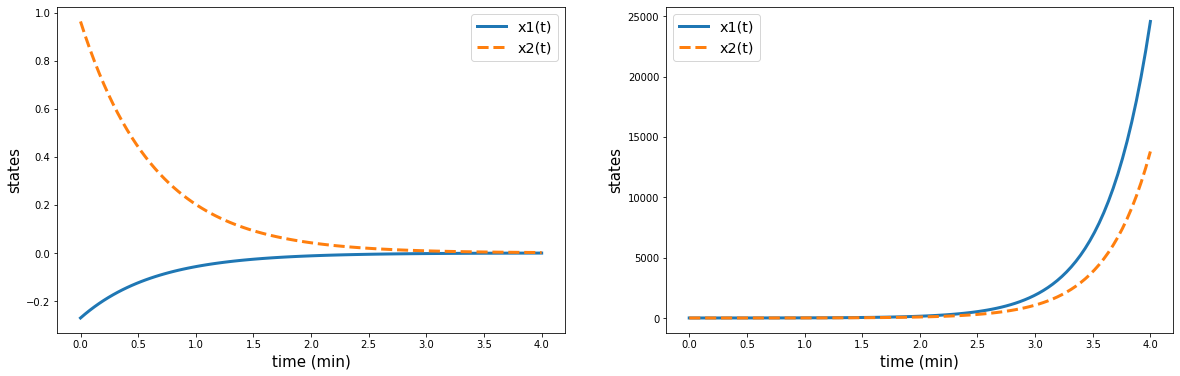

In [28]:
plt.figure(figsize= (20,6))
plt.subplot(1,2,1)
plt.plot(time, out[:,0],time, out[:,1], "--", linewidth = 3)
plt.xlabel("time (min)", size = 15)
plt.ylabel("states", size = 15)
plt.legend(["x1(t)","x2(t)"], fontsize = "x-large")
plt.subplot(1,2,2)
plt.plot(time, out[:,2],time, out[:,3], "--", linewidth = 3)
plt.xlabel("time (min)", size = 15)
plt.ylabel("states", size = 15)
plt.legend(["x1(t)","x2(t)"], fontsize = "x-large")

In [29]:
A1 = np.matrix([[-0.75,0],[0.55,-0.2]])

In [30]:
eigenval, eigenvec = np.linalg.eig(A1)

In [31]:
print(eigenval)

[-0.2  -0.75]


In [32]:
A = np.matrix([[-2.4047, 0],[5/6, -2.238]])

In [33]:
eigenval, eigenvec = np.linalg.eig(A)

In [34]:
print(eigenval)

[-2.238  -2.4047]


In [35]:
print(eigenvec)

[[ 0.          0.19615385]
 [ 1.         -0.98057313]]
